## Market Microstructure HW1

### Brian Wickman
### Fall 2025

In [1]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt

Examine the market microstructure characteristic time scale for a various mid-price execution probabilities ($\rho_m = [0,0.1,0.2]$) and two stocks.

In [13]:
# Calc variance of microstructure price
# p_l as the probability of executing trade at the bid
def calc_variance(a, b, p_l, p_m, q2 = True):
    if q2: # Q2 variance
        return (a-b)**2*(1-p_m)
    else: # Q3 variance
        p_u = 1 - p_l - p_m # infer up prob
        return (a-b)**2*(p_m/4 + p_l * p_u)
    
# Calc time scale characteristic
def calc_time_scale(price, vol, a, b, p_l, p_m, q2 = True):
    return calc_variance(a, b, p_l, p_m, q2) / (price**2 * vol**2)


### Stock A, using simplified variance from Q2, Q3.

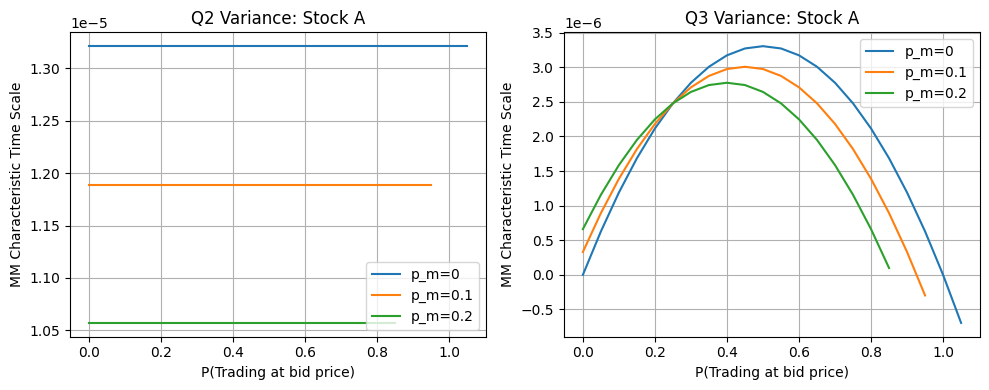

In [35]:
# Stock A
price_a, vol_a = 125.05, 0.22
rho_m_tmp_list = [0, 0.1, 0.2]
step_size = 0.05

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
# Q2 Variance plot
for rho_m_tmp in rho_m_tmp_list:
    res = []
    x_vals = np.arange(0, (1 - rho_m_tmp) + 0.1, step_size)
    for tmp_p_l in x_vals:
        res.append(calc_time_scale(price_a, vol_a, a=125.1, b=125.00, p_l=tmp_p_l, p_m=rho_m_tmp, q2=True))
    axs[0].plot(x_vals, res, label=f"p_m={rho_m_tmp}")

axs[0].set_title('Q2 Variance: Stock A')
axs[0].set_xlabel("P(Trading at bid price)")
axs[0].set_ylabel("MM Characteristic Time Scale")
axs[0].legend()
axs[0].grid(True)

# Q3 Variance plot
for rho_m_tmp in rho_m_tmp_list:
    res = []
    x_vals = np.arange(0, (1 - rho_m_tmp) + 0.1, step_size)
    for tmp_p_l in x_vals:
        res.append(calc_time_scale(price_a, vol_a, a=125.1, b=125.00, p_l=tmp_p_l, p_m=rho_m_tmp, q2=False))
    axs[1].plot(x_vals, res, label=f"p_m={rho_m_tmp}")

axs[1].set_title('Q3 Variance: Stock A')
axs[1].set_xlabel("P(Trading at bid price)")
axs[1].set_ylabel("MM Characteristic Time Scale")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


### Stock B

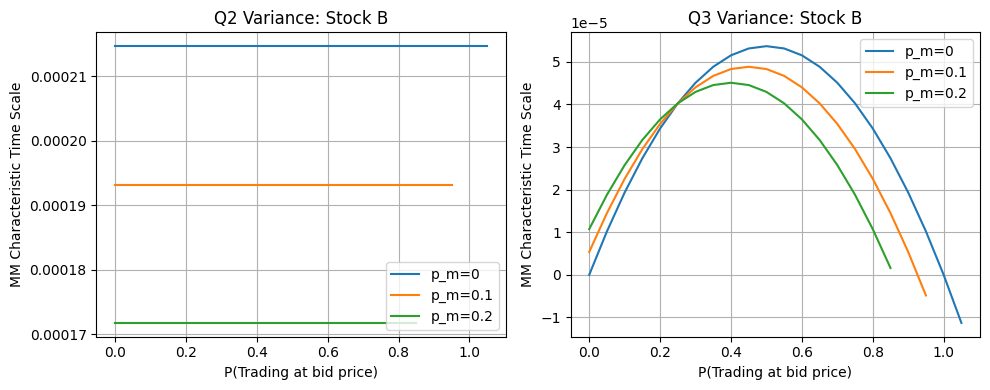

In [36]:
# Stock B
price_b, vol_b = 2437.50, 0.14

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
# Q2 Variance plot
for rho_m_tmp in rho_m_tmp_list:
    res = []
    x_vals = np.arange(0, (1 - rho_m_tmp) + 0.1, step_size)
    for tmp_p_l in x_vals:
        res.append(calc_time_scale(price_b, vol_b, a=2440.0, b=2435.00, p_l=tmp_p_l, p_m=rho_m_tmp, q2=True))
    axs[0].plot(x_vals, res, label=f"p_m={rho_m_tmp}")

axs[0].set_title('Q2 Variance: Stock B')
axs[0].set_xlabel("P(Trading at bid price)")
axs[0].set_ylabel("MM Characteristic Time Scale")
axs[0].legend()
axs[0].grid(True)

# Q3 Variance plot
for rho_m_tmp in rho_m_tmp_list:
    res = []
    x_vals = np.arange(0, (1 - rho_m_tmp) + 0.1, step_size)
    for tmp_p_l in x_vals:
        res.append(calc_time_scale(price_b, vol_b, a=2440.0, b=2435.00, p_l=tmp_p_l, p_m=rho_m_tmp, q2=False))
    axs[1].plot(x_vals, res, label=f"p_m={rho_m_tmp}")

axs[1].set_title('Q3 Variance: Stock B')
axs[1].set_xlabel("P(Trading at bid price)")
axs[1].set_ylabel("MM Characteristic Time Scale")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
